<a href="https://colab.research.google.com/github/jaynarayan94/All-Important-Topics-Codes/blob/master/Feature_Selection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EndtoEnd code for Predictive model

### 1.Import the Libraries & Load the dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

np.random.seed(123)

In [0]:
from google.colab import files

upload = files.upload()

Saving bank.csv to bank.csv


In [96]:
import io

df = pd.read_csv(io.StringIO(upload['bank.csv'].decode('utf-8')))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 2. Convert Target to 1/0

In [97]:
df['y'] = df['y'].apply(lambda x : 1 if x=='yes' else 0)

df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

## 3. Descriptive statistic

In [98]:
df.rename(columns={'y': 'target'},inplace=True)

df.target.value_counts()/len(df)

0   0.88
1   0.12
Name: target, dtype: float64

In [99]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54,0.12
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69,0.32
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00,1.00


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
target       4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.5+ KB


In [101]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

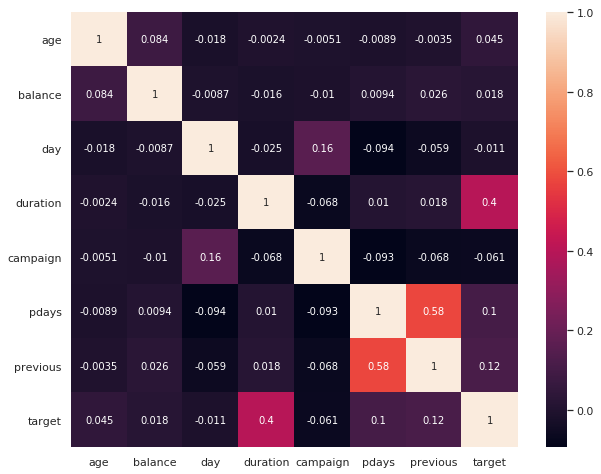

In [102]:
df_corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot= True)
plt.show()

## 4. Feature Engineering

In [0]:
# Convert categorical values to numeric using label encoder
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))

In [104]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [105]:
features = df.drop(['target'], axis= 1)

labels = df['target']

print('Feature shape :', features.shape)
print('Target shape :', labels.shape)

Feature shape : (4521, 16)
Target shape : (4521,)


## 5 Variable Selection - Voting based approach

## 5.1 Variable Importance using Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier()

clf.fit(features,labels)

y_pred = clf.predict(features)

print('Confusion Matrix :\n',pd.crosstab(labels,y_pred))
print()
print('Confusion Report :\n',classification_report(y_pred,labels))

Confusion Matrix :
 col_0      0    1
target           
0       3998    2
1         49  472

Confusion Report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4047
           1       0.91      1.00      0.95       474

    accuracy                           0.99      4521
   macro avg       0.95      0.99      0.97      4521
weighted avg       0.99      0.99      0.99      4521



In [107]:
var_imp = pd.DataFrame(clf.feature_importances_, index= features.columns, columns= ['RF']).sort_values(['RF'],ascending = False)

var_imp


,RF
duration,0.30
balance,0.10
age,0.10
month,0.09
day,0.08
pdays,0.05
job,0.05
campaign,0.04
poutcome,0.04
marital,0.03


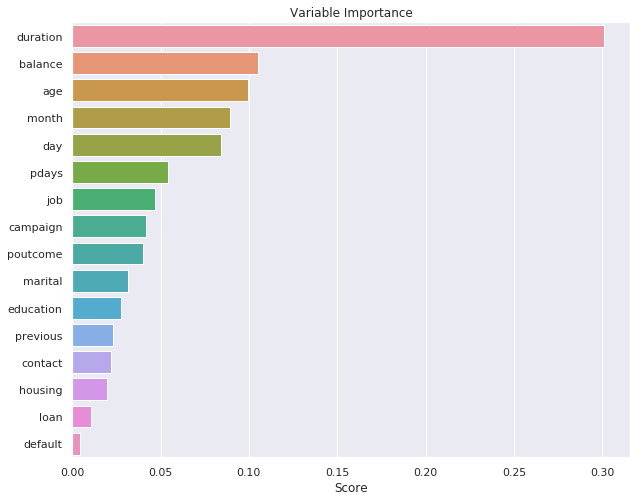

In [108]:
sns.set()
plt.figure(figsize = (10,8))
sns.barplot(x = var_imp.RF ,y = var_imp.index)
plt.title('Variable Importance')
plt.xlabel('Score')
plt.show();

## 5.2 Recursive Feature Elimination

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 10)

fit = rfe.fit(features,labels)

In [110]:
rfe_varImp = pd.DataFrame(rfe.support_,columns = ['RFE'],index = features.columns).sort_values(['RFE'],ascending=False)

rfe_varImp

,RFE
age,True
marital,True
education,True
default,True
housing,True
loan,True
contact,True
campaign,True
previous,True
poutcome,True


In [111]:
rfe_varImp[rfe_varImp.RFE == True].index

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'campaign', 'previous', 'poutcome'],
      dtype='object')

## 5.3 Chi Square

Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population.

## SelectKBest
class sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, k=10)
  
* Select features according to the k highest scores.


In [0]:
from sklearn.feature_selection import chi2,SelectKBest

model = SelectKBest(score_func = chi2, k= 10)

fit = model.fit(features.abs(), labels)

In [113]:
chi_var_imp = pd.DataFrame(fit.scores_, columns= ['Chi_Square'], index = features.columns).sort_values(['Chi_Square'],ascending = False)

chi_var_imp

,Chi_Square
duration,186041.90
pdays,11573.63
balance,7997.11
previous,325.48
contact,100.51
campaign,58.50
age,24.97
housing,21.50
loan,19.05
month,12.33


## 5.4 L1 feature selection

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

linear_svc = LinearSVC(C =0.01, penalty ='l1', dual = False).fit(features, labels)

model = SelectFromModel(linear_svc, prefit = True)

In [115]:
L1_var_select = pd.DataFrame(model.get_support(),columns=['L1'],index = features.columns)

L1_var_select

,L1
age,True
job,True
marital,True
education,False
default,False
balance,False
housing,True
loan,True
contact,True
day,True


In [116]:
L1_var_select[L1_var_select['L1']==True]

,L1
age,True
job,True
marital,True
housing,True
loan,True
contact,True
day,True
month,True
duration,True
campaign,True


In [117]:
df_all = pd.concat([var_imp, rfe_varImp, chi_var_imp,L1_var_select],axis=1).reset_index()

df_all['RFE'] = df_all['RFE'].astype(int)
df_all['L1'] = df_all['L1'].astype(int)

df_all = df_all.sort_values(by=['RF','RFE','Chi_Square', 'L1'],ascending=False).reset_index(drop=True).rename(columns = {'index': 'Features'})

df_all

,Features,RF,RFE,Chi_Square,L1
0,duration,0.30,0,186041.90,1
1,balance,0.10,0,7997.11,0
2,age,0.10,1,24.97,1
3,month,0.09,0,12.33,1
4,day,0.08,0,2.44,1
5,pdays,0.05,0,11573.63,1
6,job,0.05,0,8.15,1
7,campaign,0.04,1,58.50,1
8,poutcome,0.04,1,11.87,1
9,marital,0.03,1,0.32,1


In [118]:
# The way to sort in descending order.

from functools import reduce
dfs = [var_imp.reset_index(), rfe_varImp.reset_index(), chi_var_imp.reset_index(),L1_var_select.reset_index()]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

columns = ['RF',	'RFE',	'Chi_Square','L1']

score_table = pd.DataFrame()
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)

score_table.rename(columns = {'index': 'Features'})

,Features,RF,RFE,Chi_Square,L1,final_score
0,duration,1,0,1,1,3
1,balance,1,0,1,0,2
2,age,1,1,0,1,3
3,month,1,0,0,1,2
4,day,1,0,0,1,2
5,pdays,0,0,1,1,2
6,job,0,0,0,1,1
7,campaign,0,1,0,1,2
8,poutcome,0,1,0,1,2
9,marital,0,1,0,1,2


## 5.5 Multicollinearity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcultate_vif(features):
  vif = pd.DataFrame()
  vif['Features'] = features.columns
  vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
  return (vif.sort_values(by = ['VIF'] ,ascending=False)).reset_index(drop =True)

calcultate_vif(features)

,Features,VIF
0,poutcome,18.71
1,age,12.61
2,month,5.34
3,day,4.68
4,marital,4.65
5,education,3.75
6,pdays,3.22
7,job,2.93
8,housing,2.60
9,duration,2.03


In [120]:
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]

vif = calcultate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calcultate_vif(features)
    
vif

,Features,VIF
0,age,6.87
1,month,5.19
2,day,4.48
3,marital,3.61
4,housing,2.51
5,duration,1.99
6,contact,1.98
7,campaign,1.87
8,pdays,1.85
9,previous,1.67


## 6. Descriptive Stats and Visualization - For selected variables

In [0]:
final_vars = list(vif['Features']) + ['target']

df1 = df[final_vars].fillna(0)

In [122]:
df1.describe()

,age,month,day,marital,housing,duration,contact,campaign,pdays,previous,balance,loan,target
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,5.54,15.92,1.15,0.57,263.96,0.65,2.79,39.77,0.54,1422.66,0.15,0.12
std,10.58,3.00,8.25,0.60,0.50,259.86,0.90,3.11,100.12,1.69,3009.64,0.36,0.32
min,19.00,0.00,1.00,0.00,0.00,4.00,0.00,1.00,-1.00,0.00,-3313.00,0.00,0.00
25%,33.00,3.00,9.00,1.00,0.00,104.00,0.00,1.00,-1.00,0.00,69.00,0.00,0.00
50%,39.00,6.00,16.00,1.00,1.00,185.00,0.00,2.00,-1.00,0.00,444.00,0.00,0.00
75%,49.00,8.00,21.00,2.00,1.00,329.00,2.00,3.00,-1.00,0.00,1480.00,0.00,0.00
max,87.00,11.00,31.00,2.00,1.00,3025.00,2.00,50.00,871.00,25.00,71188.00,1.00,1.00


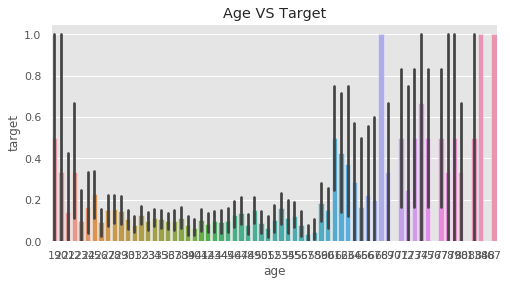

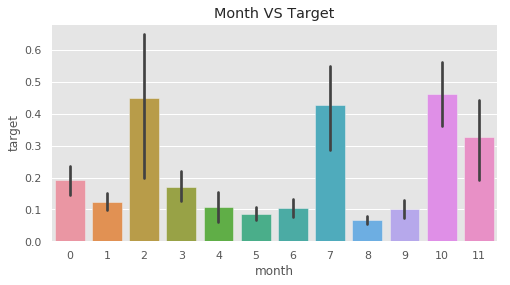

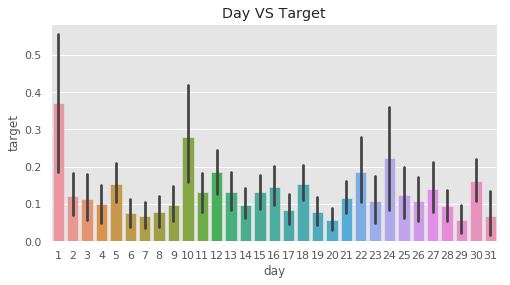

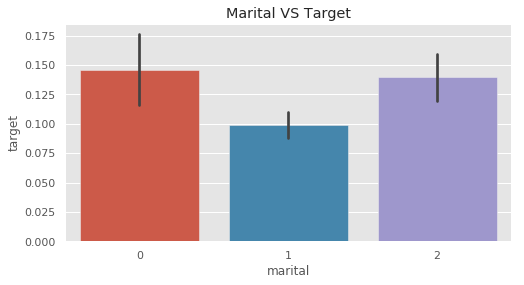

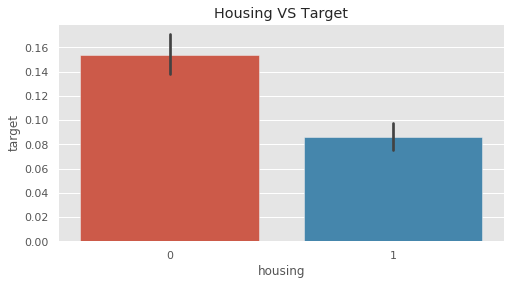

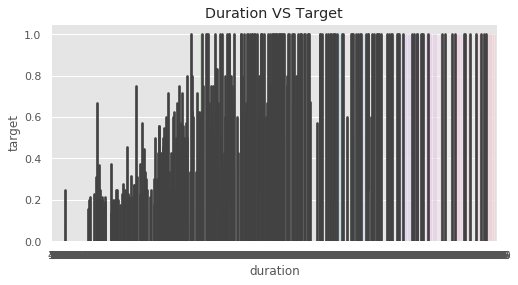

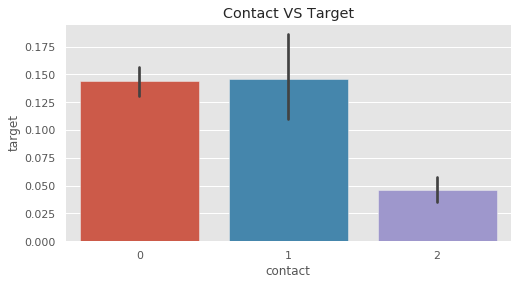

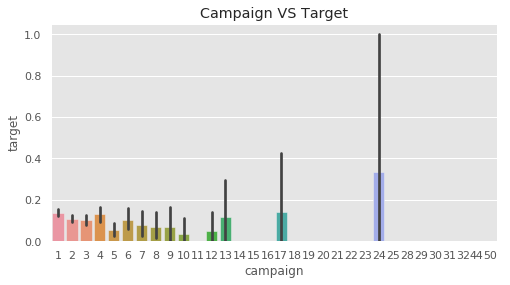

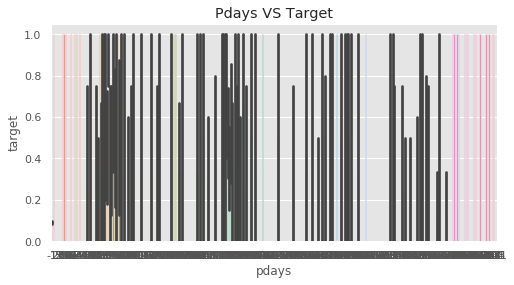

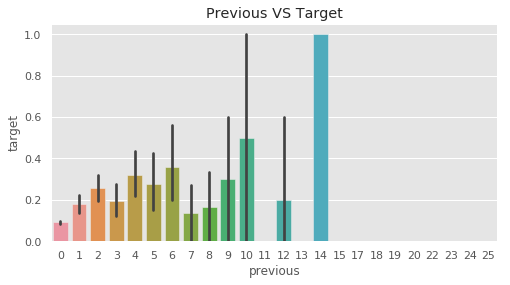

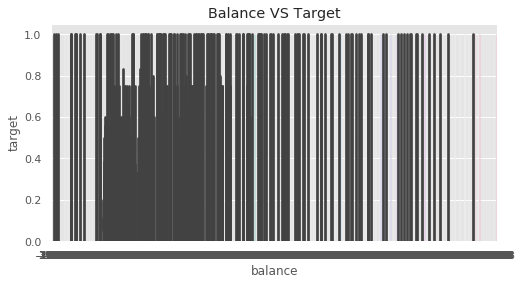

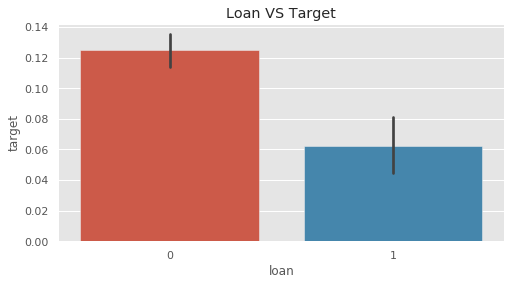

In [125]:
plt.style.use('ggplot')
columns = df1.columns[:-1]

for col in columns:
  plt.figure(figsize=(8,4))
  sns.barplot(x = col,y = 'target',data=df1)
  plt.title('{} VS Target'.format(col.capitalize()))
  plt.show();

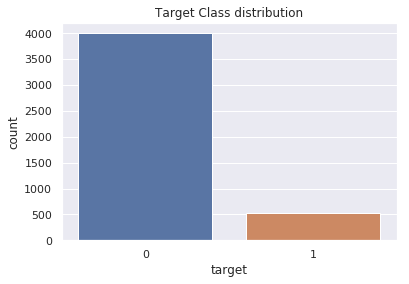

In [124]:
sns.set()
sns.countplot(df['target'])
plt.title('Target Class distribution');

## 7. Model

In [0]:
from sklearn.metrics import classification_report,accuracy_score,auc,roc_auc_score
from sklearn.model_selection import train_test_split

X = df1.drop('target',axis =1)
y = df1['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

In [0]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=30,
    population_size=30,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}.{transform}')

Generation 1 - Current best internal CV score: 0.8515237705096039
Generation 2 - Current best internal CV score: 0.851832851400572
Generation 3 - Current best internal CV score: 0.8526827382046631
Generation 4 - Current best internal CV score: 0.852791432960211
Generation 5 - Current best internal CV score: 0.8635403264213798
Generation 6 - Current best internal CV score: 0.8635403264213798
Generation 7 - Current best internal CV score: 0.8635403264213798
Generation 8 - Current best internal CV score: 0.8635403264213798
Generation 9 - Current best internal CV score: 0.8697268849879733
Generation 10 - Current best internal CV score: 0.8697268849879733
Generation 11 - Current best internal CV score: 0.8697268849879733
Generation 12 - Current best internal CV score: 0.8697268849879733
Generation 13 - Current best internal CV score: 0.8697268849879733
Generation 14 - Current best internal CV score: 0.8709270892675329
Generation 15 - Current best internal CV score: 0.8709270892675329
Genera

In [0]:
tpot = TPOTClassifier(generations=5,population_size=100,verbosity=2,n_jobs=-1)
tpot.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.937015356025039


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=9, max_features=0.6500000000000001, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.8500000000000001), criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [128]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)

X_train,y_train = smote.fit_resample(X_train,y_train)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('Train Target Class :',Counter(y_train),'\n')

print('Test Target Class :',Counter(y_test))

(6398, 12) (6398,)
(905, 12) (905,)
Train Target Class : Counter({0: 3199, 1: 3199}) 

Test Target Class : Counter({0: 801, 1: 104})


## Model : Decison Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight=None,
                                  criterion='gini',
                                  max_depth=7,
                                  max_features=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  min_samples_leaf=6,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  presort=False,
                                  random_state=12,
                                  splitter='best')

DT_model.fit(X_train,y_train)

DT_y_pred = DT_model.predict(X_test)

print('Training set Acccuracy Score :',DT_model.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',DT_model.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,DT_y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,DT_y_pred))

Training set Acccuracy Score : 0.8705845576742732 

Test set Acccuracy Score : 0.8596685082872928 

Confusion Matrix :
 col_0     0   1
target         
0       703  98
1        29  75 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       801
           1       0.43      0.72      0.54       104

    accuracy                           0.86       905
   macro avg       0.70      0.80      0.73       905
weighted avg       0.90      0.86      0.87       905



## 7.1 Model : Random Forest Classifier

In [132]:
from sklearn.metrics import classification_report,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(X_train,y_train)

y_pred = RF_model.predict(X_test)

print('Training set Acccuracy Score :',RF_model.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',RF_model.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,y_pred))

Training set Acccuracy Score : 0.9968740231322288 

Test set Acccuracy Score : 0.8685082872928177 

Confusion Matrix :
 col_0     0   1
target         
0       736  65
1        54  50 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       801
           1       0.43      0.48      0.46       104

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.69       905
weighted avg       0.87      0.87      0.87       905



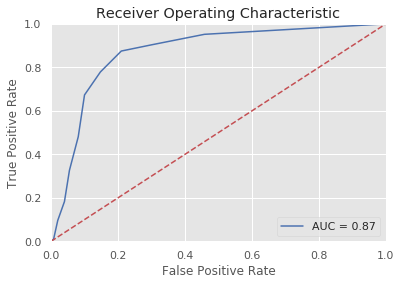

In [133]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model : Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

log_reg_y_pred = log_reg.predict(X_test)

print('Training set Acccuracy Score :',log_reg.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',log_reg.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,log_reg_y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,log_reg_y_pred))

Training set Acccuracy Score : 0.8446389496717724 

Test set Acccuracy Score : 0.8176795580110497 

Confusion Matrix :
 col_0     0    1
target          
0       665  136
1        29   75 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       801
           1       0.36      0.72      0.48       104

    accuracy                           0.82       905
   macro avg       0.66      0.78      0.68       905
weighted avg       0.89      0.82      0.84       905



## Model : Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

NB_model.fit(X_train,y_train)

nb_y_pred = NB_model.predict(X_test)

print('Training set Acccuracy Score :',NB_model.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',NB_model.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,nb_y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,nb_y_pred))

Training set Acccuracy Score : 0.7530478274460769 

Test set Acccuracy Score : 0.6243093922651933 

Confusion Matrix :
 col_0     0    1
target          
0       483  318
1        22   82 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.96      0.60      0.74       801
           1       0.20      0.79      0.33       104

    accuracy                           0.62       905
   macro avg       0.58      0.70      0.53       905
weighted avg       0.87      0.62      0.69       905



## Model : Gradient Boosting


In [137]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()

GB_model.fit(X_train,y_train)

GB_y_pred = GB_model.predict(X_test)

print('Training set Acccuracy Score :',GB_model.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',GB_model.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,GB_y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,GB_y_pred))

Training set Acccuracy Score : 0.9040325101594249 

Test set Acccuracy Score : 0.8552486187845304 

Confusion Matrix :
 col_0     0   1
target         
0       707  94
1        37  67 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       801
           1       0.42      0.64      0.51       104

    accuracy                           0.86       905
   macro avg       0.68      0.76      0.71       905
weighted avg       0.89      0.86      0.87       905



## 8. Performance Tuning

### Random Forest - Hyper parameter tuning

In [0]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=10, stop=500, num= 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(start=2, stop =10,num =9)]
max_depth.append(None)
min_sample_split = [2,5,6,8,10]
min_sample_leaf = [1,2,3,4]
bootstrap = [True, False]

params = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": [2,5,6,8,10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

model = RandomForestClassifier()

grid_rf = GridSearchCV(estimator=model,param_grid = params, cv=10, verbose=1,n_jobs = -1)

grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 2575 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4675 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 7375 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 10675 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 11997 out of 12000 | elapsed:  7.9min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  7.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
print('Best ROC--AUC Score :',grid_rf.best_score_)

print('\nBest Params : \n',grid_rf.best_params_)

Best ROC--AUC Score : 0.9296655204751485

Best Params : 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [126]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(**grid_rf.best_params_)

model_rf.fit(X_train,y_train)

rf_y_pred = model_rf.predict(X_test)

print('Training set Acccuracy Score :',model_rf.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',model_rf.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,rf_y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,rf_y_pred))

Training set Acccuracy Score : 1.0 

Test set Acccuracy Score : 0.8718232044198895 

Confusion Matrix :
 col_0     0   1
target         
0       747  54
1        62  42 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       801
           1       0.44      0.40      0.42       104

    accuracy                           0.87       905
   macro avg       0.68      0.67      0.67       905
weighted avg       0.87      0.87      0.87       905



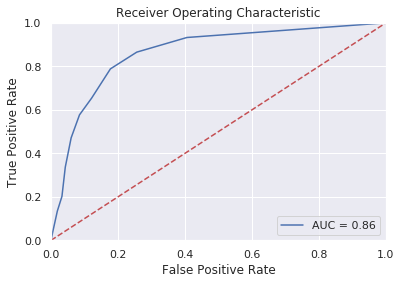

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting - Hyper parameter tuning

In [0]:
from sklearn import metrics   
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 5, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, y_train)

print(gf_tune.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 62.1min finished


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 173}


In [0]:
print('Best Score :',gf_tune.best_score_)

Best Score : 0.9374804626445764


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(**gf_tune.best_params_)

GB_clf.fit(X_train,y_train)

gb_y_pred = GB_clf.predict(X_test)

print('Training set Acccuracy Score :',GB_clf.score(X_train,y_train),'\n')

print('Test set Acccuracy Score :',GB_clf.score(X_test,y_test),'\n')

print('Confusion Matrix :\n', pd.crosstab(y_test,gb_y_pred),'\n')

print('Classification Report of Test Set:\n', classification_report(y_test,gb_y_pred))

Training set Acccuracy Score : 1.0 

Test set Acccuracy Score : 0.8795580110497238 

Confusion Matrix :
 col_0     0   1
target         
0       741  60
1        49  55 

Classification Report of Test Set:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       801
           1       0.48      0.53      0.50       104

    accuracy                           0.88       905
   macro avg       0.71      0.73      0.72       905
weighted avg       0.89      0.88      0.88       905



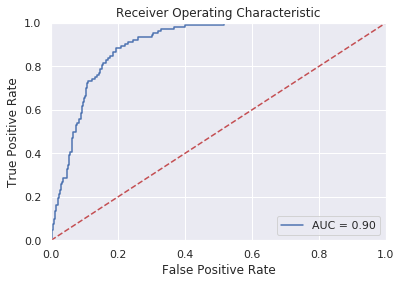

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = GB_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()